## 0. Data Ingestion, Premliminary Data Analysis

In [90]:
#import ncessary libaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [91]:
# load dataset through url
train_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

test_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"


df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

In [92]:
# create a copy of the dataset
df_copy = df_train.copy()

In [93]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
# set loant_id as inndex
df_train.set_index("Loan_ID", inplace=True)

In [95]:
# check the column names
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [96]:
# check the  basic information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [97]:
# check for missing values
df_train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
#Loan_Amount_Term and Credit_history are more categorical than continous
df_train["Credit_History"] = df_train["Credit_History"].astype(str)
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"] .astype(str)

In [99]:
df_train["Credit_History"] 

Loan_ID
LP001002    1.0
LP001003    1.0
LP001005    1.0
LP001006    1.0
LP001008    1.0
           ... 
LP002978    1.0
LP002979    1.0
LP002983    1.0
LP002984    1.0
LP002990    0.0
Name: Credit_History, Length: 614, dtype: object

In [100]:
df_train["Credit_History"] = df_train["Credit_History"].map({"1.0":"good", "0.0":"bad" })

In [101]:
# handle missing values in numerical columns

 # extracts numerical columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns 
#Loan_Amount_Term and Credit_history are more categorical than continous


# check for missing values
df_train[num_cols].isna().sum()

# fill the  missing values in numerical columns with median
df_train.loc[:, num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())  

# # recheck for missing values
df_train[num_cols].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [102]:
# # handle missing values in categorical columns

# # extracts categorical column
cat_cols = df_train.select_dtypes(include="object").columns 
#Loan_Amount_Term and Credit_history are more categorical than continous

# # check for missing values
# df_train[cat_cols].isna().sum()

# get the mode of the columns
modes = df_train[cat_cols].apply(lambda x: x.value_counts().index[0])

# fill the missing values in the catgorical columns with modes
df_train[cat_cols] = df_train[cat_cols].fillna(modes)


# rechecck the missing values
df_train[cat_cols].isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [103]:
# check for duplicates
df_train.duplicated().sum()

np.int64(0)

In [104]:
# get the descriptive analysis for the numwercal columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns
df_train[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


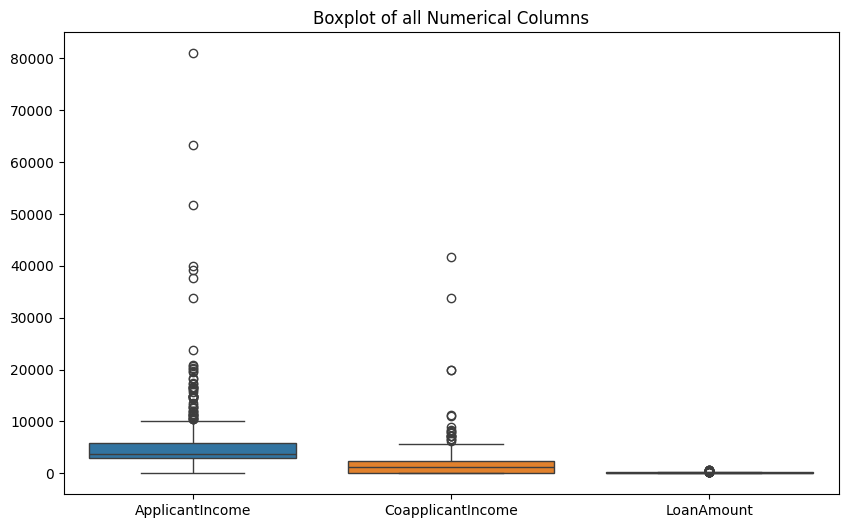

In [105]:
# check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train[num_cols])
plt.title("Boxplot of all Numerical Columns")
plt.show()


In [106]:
#Identify number of outliers
outlier_columns = []
for i in num_cols:
    q1 = df_train[i].quantile(0.25)
    q3 = df_train[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_count = ((df_train[i] < lower) | (df_train[i] > upper)).sum()
    print(f"The number of outliers for {i} is {outlier_count}")
    if outlier_count > 0:
        outlier_columns.append(i)

The number of outliers for ApplicantIncome is 50
The number of outliers for CoapplicantIncome is 18
The number of outliers for LoanAmount is 41


In [107]:
#Locate outliers and handle using IQR method and clip
def clean_outliers(data, i):
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), 
                       data[i].clip(lower = lower, upper = upper).astype(data[i].dtype), data[i])
    return data

for i in outlier_columns:
    df_train = clean_outliers(df_train, i)

df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,good,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,good,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,good,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,good,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,good,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,good,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,good,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,good,Urban,Y


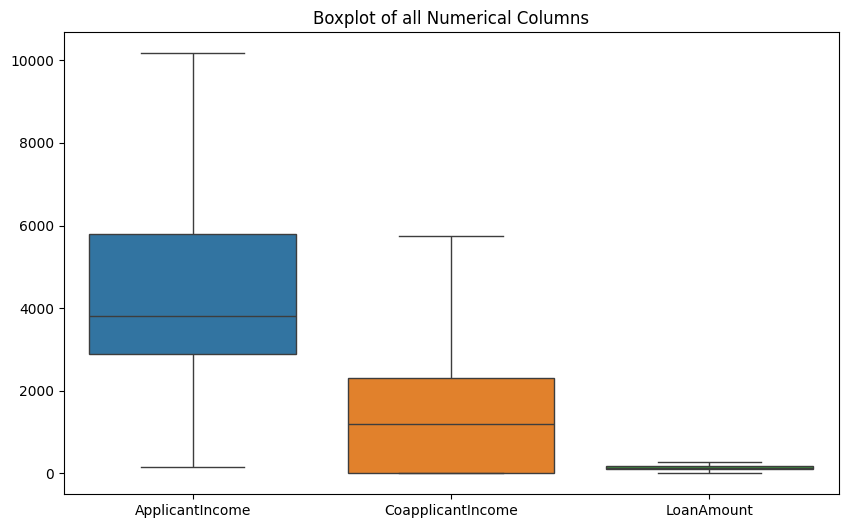

In [108]:
# recheck for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train[num_cols])
plt.title("Boxplot of all Numerical Columns")
plt.show()


In [109]:
# get the descriptive analysis for the numwercal columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns
df_train[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,4617.091205,1419.702231,137.365635
std,2479.806058,1624.605892,55.779749
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,10171.000000,5743.125000,261.500000


----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------
 

In [110]:
def univarte_numerical_eda(df, column):
    """ Performs a univarate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")
    
    plt.figure(figsize=(12,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color="teal")
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color="teal")
    plt.title(f"\n Boxplot of {column}", fontsize=13)
    
    plt.tight_layout()
    plt.show()
    
    
      # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")
    

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       4617.091205
std        2479.806058
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.000000

Skewness: 1.040
Kurtosis: 0.126


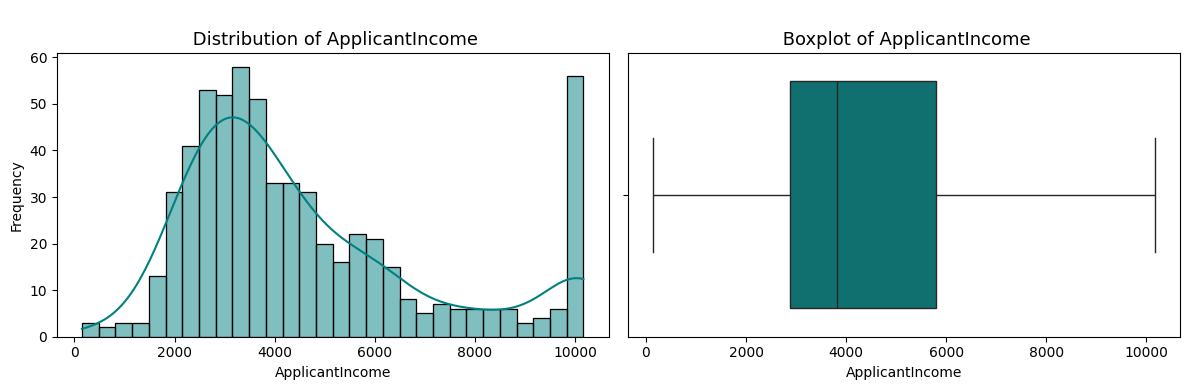


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1419.702231
std          1624.605892
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max          5743.125000

Skewness: 1.013
Kurtosis: 0.245


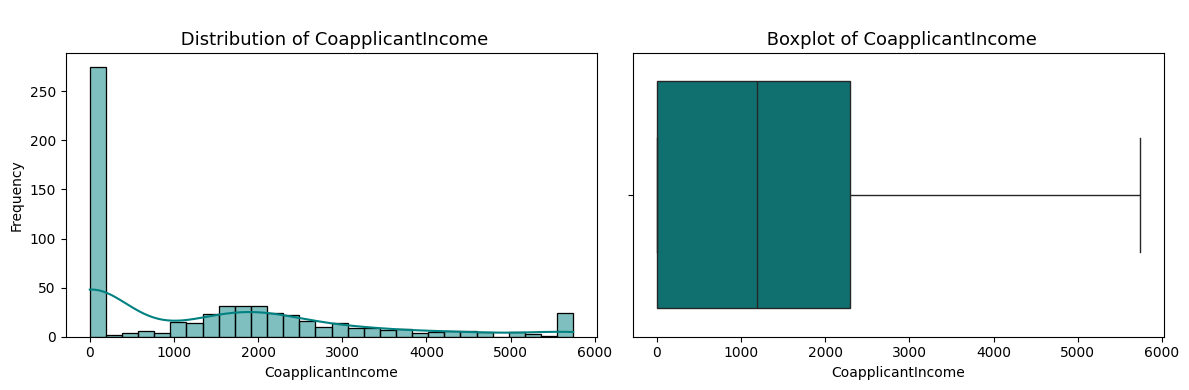


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   137.365635
std     55.779749
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    261.500000

Skewness: 0.684
Kurtosis: 0.112


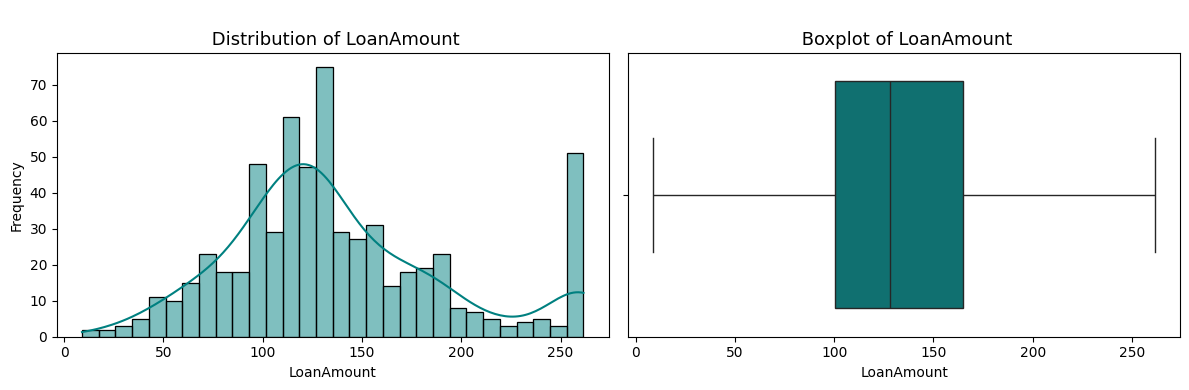

LoanAmount is moderately skewed.


In [111]:
for col in num_cols:
    univarte_numerical_eda(df_train, col)

In [112]:
# convert back to int  type
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"] .astype(float)

In [113]:
# # extracts categorical column
cat_cols = df_train.select_dtypes(include="object").columns 

In [114]:
def univaraite_categorical_eda(df, col):
    """Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, a countplot and piechat.
    """
    # Frequency + Proportion
    frq = df[col].value_counts()
    prop = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count":frq, "Percentage":prop.round(2)})
    print(summary)
    print()
    
    
    plt.figure(figsize=(8,5))
    # Vizualization: Barchat
    plt.subplot(1,2,1)
    ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")
    plt.title(f" Distribution(Barchat) of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    
    # Piechat
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie(autopct="%1.1f%%",startangle=90)
    plt.title(f" Distribution(Piechat) of {col}", fontsize=13)
    
    
      # Annotate each bar with percentage
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')
        
        
    
    plt.tight_layout()
    plt.show()
    
    
    

In [115]:
df_train["Credit_History"].isna().sum()

np.int64(0)

        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


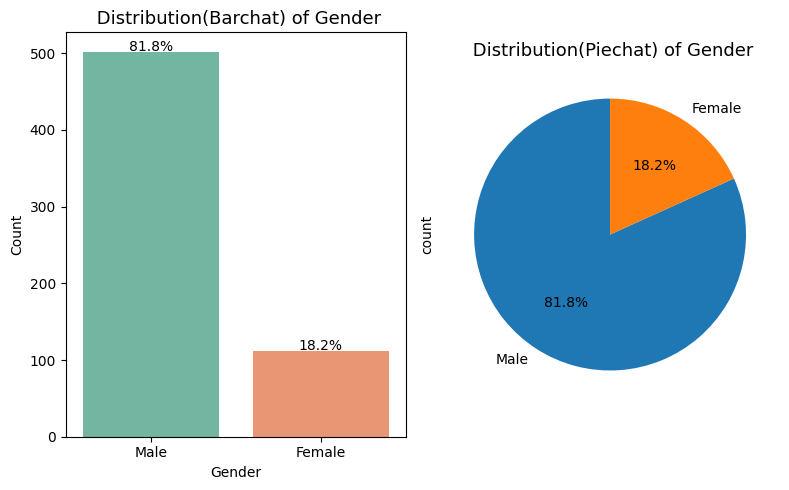

         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


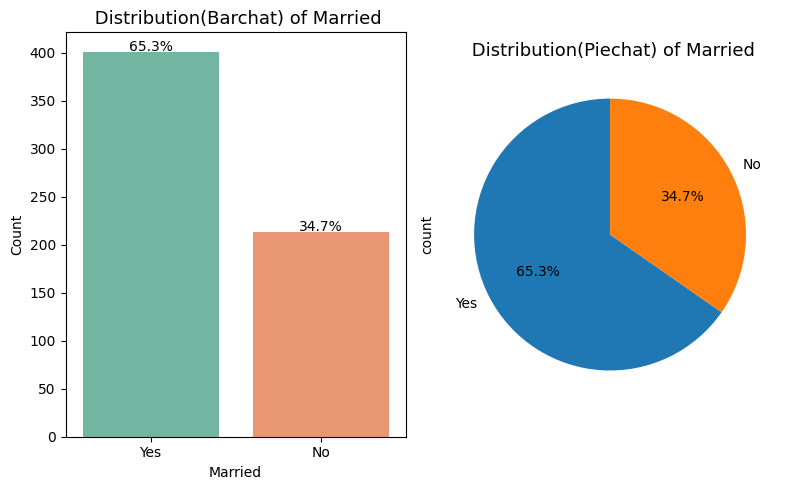

            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


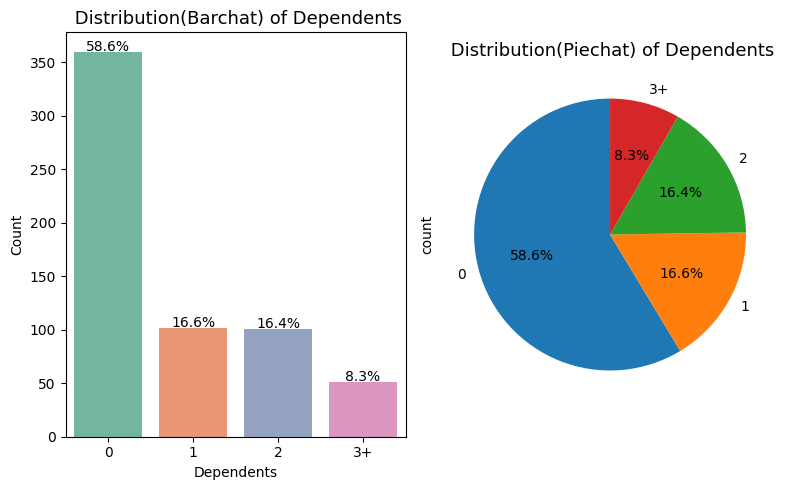

              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


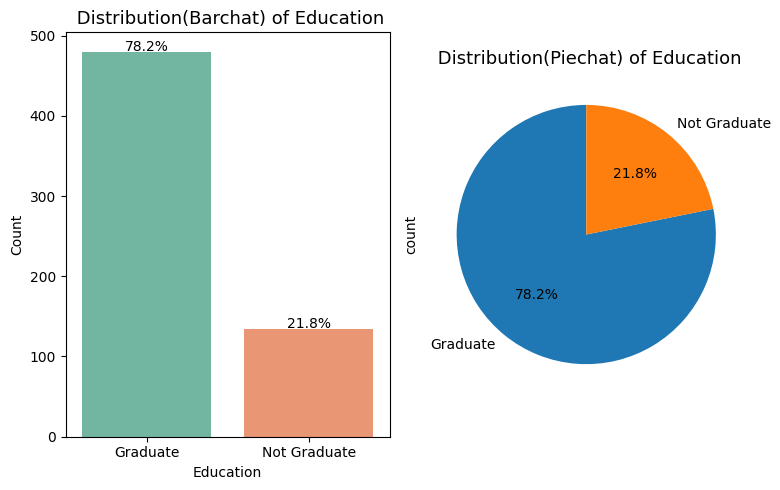

               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


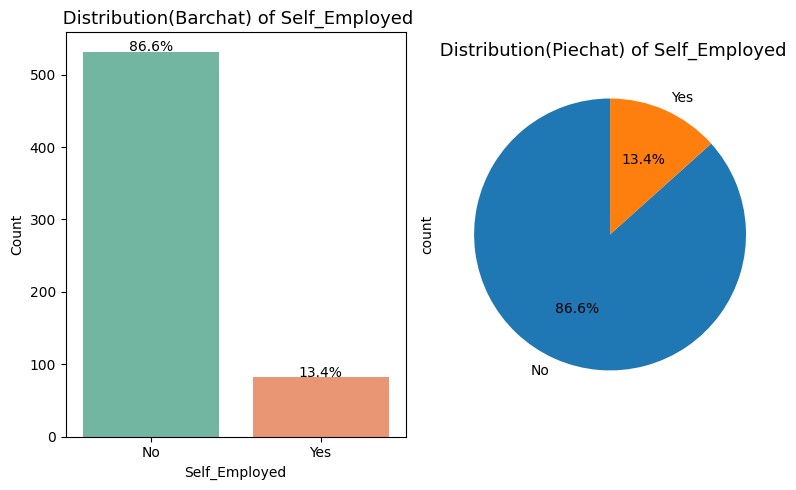

                Count  Percentage
Credit_History                   
good              525        85.5
bad                89        14.5



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


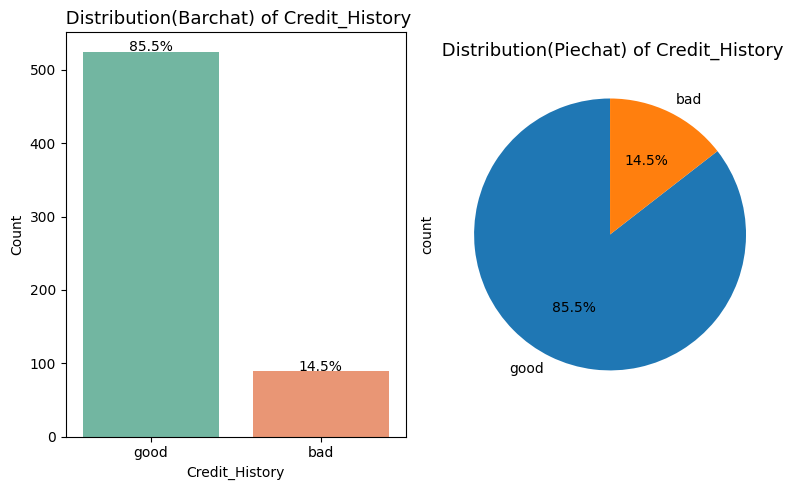

               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


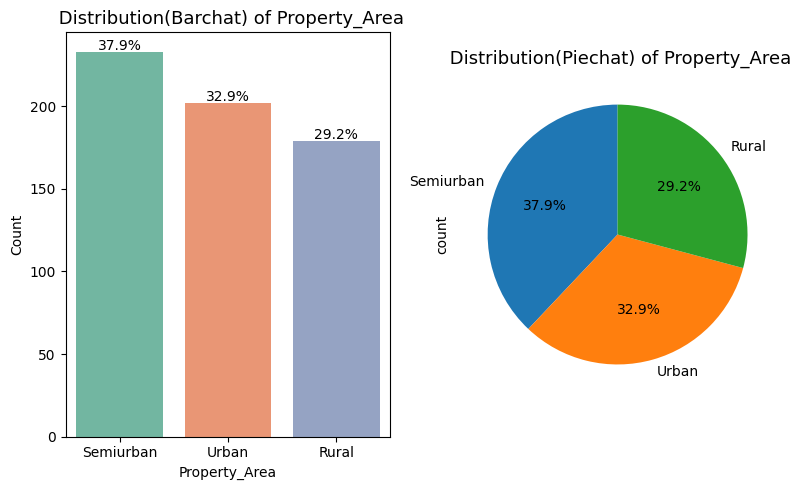

             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\ncc\AppData\Local\Temp\ipykernel_14980\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


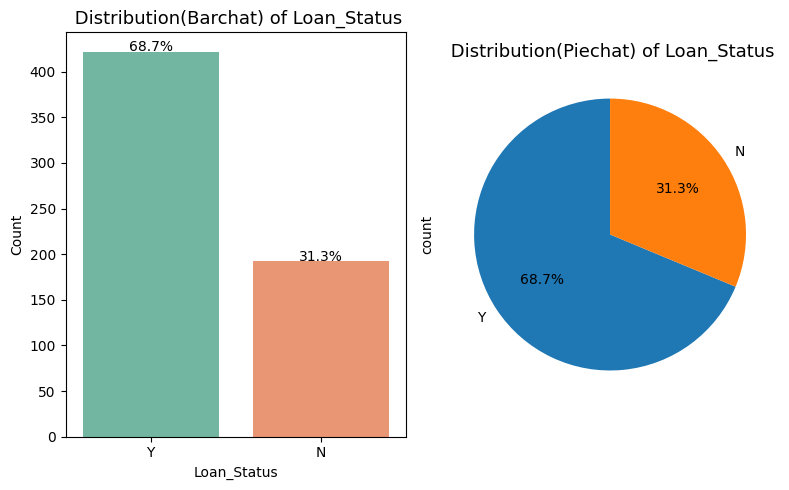

In [116]:
for col in cat_cols:
    univaraite_categorical_eda(df_train, col)

### Observations
* We notice imbalance in our target data
* In fact the number of approved home loans is more than twice the number of declined home loans.

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

In [76]:
# let make our target value a numerical column
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N':0})


In [77]:
df_train['Loan_Status']

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int64

In [78]:
def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

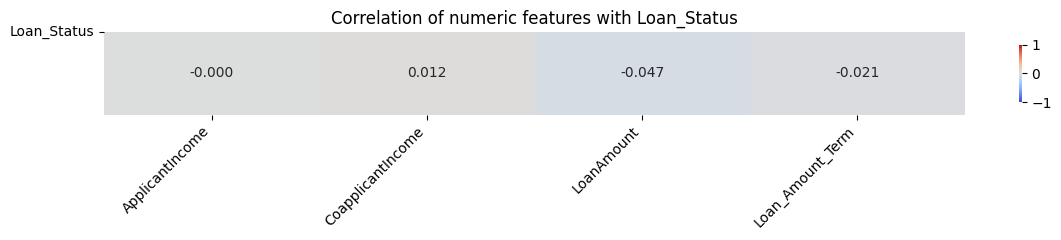

LoanAmount          -0.047262
Loan_Amount_Term    -0.021268
CoapplicantIncome    0.011983
ApplicantIncome     -0.000442
dtype: float64


In [80]:
corr_series =  correlation_with_target(df_train, 'Loan_Status', figsize=(12,2.5))
print(corr_series) 

### Observations
* loan_amount has the strongest correlation among our features with our target variable
* Other features have very weak correlation with our target data.
* Further investigations are required to create new features from features that have weak correlation with the target variable.

In [81]:
import scipy.stats as stats
import statsmodels.api as sm

In [85]:
def reg_plot(data, col1, col2):
    """
    Visualise the relationship between numerical columns using regplot
    """

    """
    Params
    ----------
    data : pd.DataFrame
        Data containing numerical features
    col1 : str
        Name of the first column
    col2 : str
        Name of the second column
    """
    try:
        if col1 in data.columns and col2 in data.columns:
            corr, pvalue = stats.pearsonr(data[col1], data[col2])
            ax = sns.regplot(data = data, x = col1, y = col2, scatter_kws = {'alpha':0.4}, line_kws = {'color': 'red'}, color = "blue")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.set_title(f"{col1} vs {col2} \nCorrelation: {corr:.3f}, p value: {pvalue:.3f}")
            plt.show()
        else:
            raise ValueError("Columns not found in data")
    except ValueError as e:
        print(e)

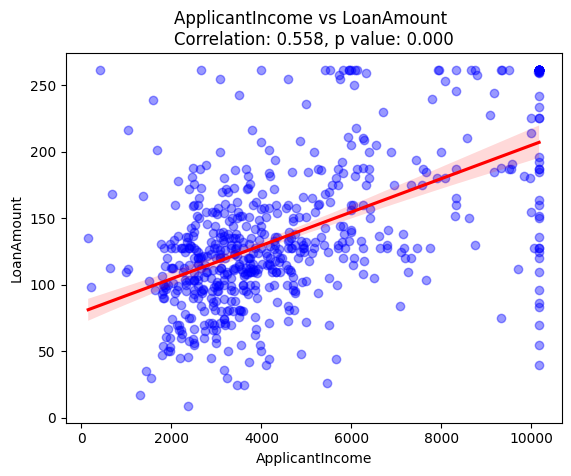

In [86]:
reg_plot(df_train, "ApplicantIncome", "LoanAmount")

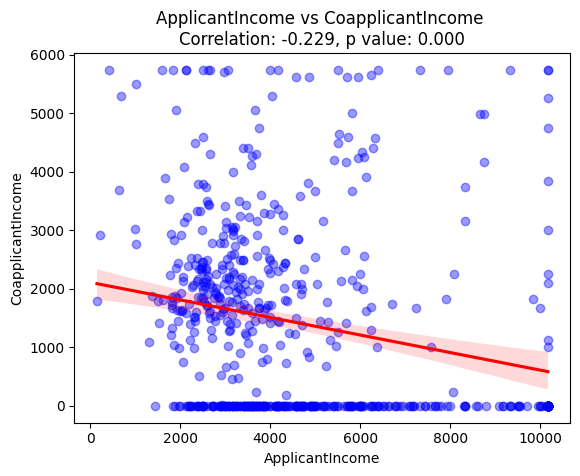

In [ ]:
reg_plot(df_train, "ApplicantIncome", "CoapplicantIncome")

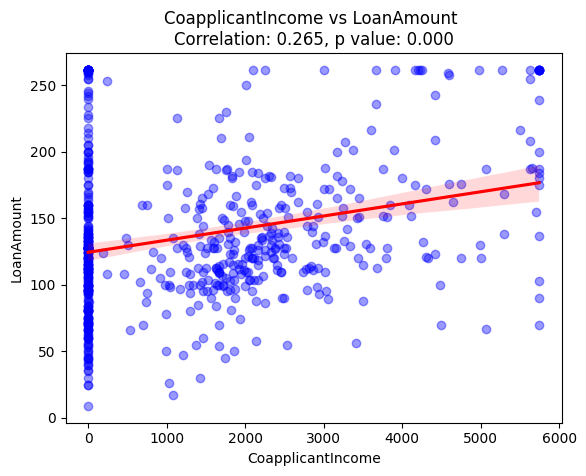

In [88]:
reg_plot(df_train, "CoapplicantIncome", "LoanAmount")